In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import RYGate

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex

In [2]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import CSwapGate

<IPython.core.display.Latex object>

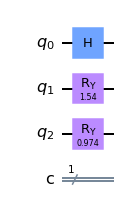

<IPython.core.display.Latex object>

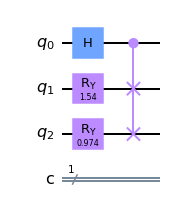

Statevector([ 0.63465534+0.j,  0.        +0.j,  0.47552826+0.j,
              0.13949555+0.j,  0.47552826+0.j, -0.13949555+0.j,
              0.32563835+0.j,  0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

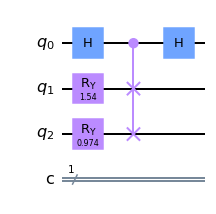

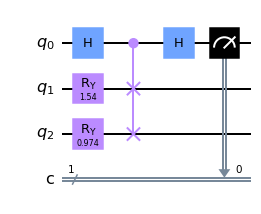

In [3]:
c = QuantumCircuit(3,1)
gate1 = RYGate(0.49 * math.pi)
gate2 = RYGate(0.31 * math.pi)
c.h(0)
c.append(gate1, [1])
c.append(gate2, [2])

stv1 = qi.Statevector.from_instruction(c)
display(stv1.draw('latex'))
display(c.draw("mpl"))

c.append(CSwapGate(), [0, 1, 2])

stv2 = qi.Statevector.from_instruction(c)
display(stv2.draw('latex'))
display(c.draw("mpl"))


c.h(0)

stv3 = qi.Statevector.from_instruction(c)
print(stv3)
display(stv3.draw('latex'))
display(c.draw("mpl"))

c.measure(0, 0)
display(c.draw("mpl"))



In [4]:
def run_experiment(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=50000).result()
    counts = results.get_counts()
    display(plot_histogram(counts))
    return counts

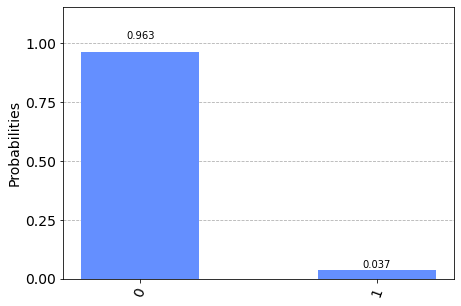

{'1': 1856, '0': 48144}


In [5]:
counts = run_experiment(c)
print(counts)

In [6]:
math.sqrt(1 - (0.038*2))

0.9612491872558333

<IPython.core.display.Latex object>

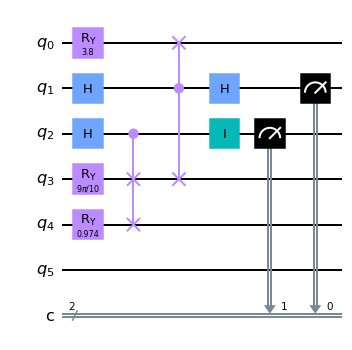

(-0.03166568253632969+0j)


In [40]:
c = QuantumCircuit(6,2)
gatePHI = RYGate(1.21 * math.pi)
gate1 = RYGate(0.9 * math.pi)
gate2 = RYGate(0.31 * math.pi)
c.append(gatePHI, [0])
c.h([1, 2])
c.append(gate1, [3])
c.append(gate2, [4])

c.append(CSwapGate(), [2, 3, 4])
c.append(CSwapGate(), [1, 0, 3])
c.h(1)
c.i(2)

stv1 = qi.Statevector.from_instruction(c)

# c.x(5)
# c.h(5)
# c.h(1)
# c.h(2)
# c.x(1)
# c.x(2)
# c.ccx(1, 2, 5)
# c.x(1)
# c.x(2)
# c.h(1)
# c.h(2)

c.measure(1, 0)
c.measure(2, 1)

display(stv1.draw('latex'))
display(c.draw("mpl"))

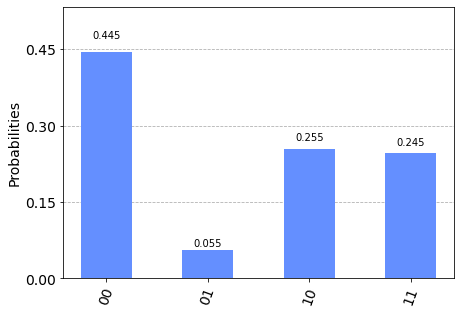

{'01': 2761, '10': 12741, '11': 12267, '00': 22231}
01 0.8826376922467383 11 0.13767328986002664


In [41]:
counts = run_experiment(c)
print(counts)
q3_count = counts['00'] + counts['01']
q4_count = counts['10'] + counts['11']
p3, p4 = counts['01'] / q3_count, counts['11'] / q4_count
res3, res4 = (math.sqrt(1 -  2 * p3), math.sqrt(1 -  2 * p4))
print("01", res3, "11" ,res4)

In [47]:
def get_answer(gate):
    x4 = QuantumCircuit(1)
    x4.append(gate, [0])
    stv1 = qi.Statevector.from_instruction(x4)
    return (stv1[0], stv1[1])

In [50]:
real = get_answer(gatePHI)
ans3 = get_answer(gate1)
ans4 = get_answer(gate2)

In [70]:
def run_experiment_with_shots(circuit, shots, draw = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if draw:
        display(plot_histogram(counts))
    return counts

In [52]:
def postproces_counts(counts):
    q3_count = counts['00'] + counts['01']
    q4_count = counts['10'] + counts['11']
    p3, p4 = counts['01'] / q3_count, counts['11'] / q4_count
    res3, res4 = (math.sqrt(1 -  2 * p3), math.sqrt(1 -  2 * p4))
    return {3: res3, 4: res4}

In [61]:
def evaluate(result, product3, product4):
    res3 =  (abs(result[3] - product3))/(result[3])
    res4 =  (abs(result[4] - product4))/(result[4])
    return {3: res3, 4: res4}

In [65]:
def get_curcuit(gatePHI, gate1, gate2):
    c = QuantumCircuit(6,2)
    c.append(gatePHI, [0])
    c.h([1, 2])
    c.append(gate1, [3])
    c.append(gate2, [4])

    c.append(CSwapGate(), [2, 3, 4])
    c.append(CSwapGate(), [1, 0, 3])
    c.h(1)
    c.i(2)

    stv1 = qi.Statevector.from_instruction(c)

    # c.x(5)
    # c.h(5)
    # c.h(1)
    # c.h(2)
    # c.x(1)
    # c.x(2)
    # c.ccx(1, 2, 5)
    # c.x(1)
    # c.x(2)
    # c.h(1)
    # c.h(2)

    c.measure(1, 0)
    c.measure(2, 1)

    display(c.draw("mpl"))
    return c

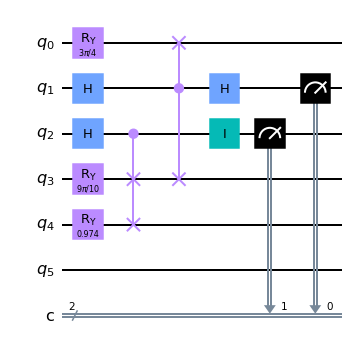

{3: 0.0014265343273735236, 4: 0.0014959401904660475}


In [93]:
gatePHI = RYGate(0.75 * math.pi)
gate1 = RYGate(0.9 * math.pi)
gate2 = RYGate(0.31 * math.pi)
gate3 = RYGate(0.10 * math.pi)
gate4 = RYGate(1.5 * math.pi)

real = get_answer(gatePHI)
ans3 = get_answer(gate1)
ans4 = get_answer(gate2)

product3 = real[0] * ans3[0] + real[1] * ans3[1] 
product4 = real[0] * ans4[0] + real[1] * ans4[1]

qc = get_curcuit(gatePHI, gate1, gate2)
counts = run_experiment_with_shots(qc, 10000, draw = False)
result = postproces_counts(counts)
final  = evaluate(result, product3, product4)
print(final)


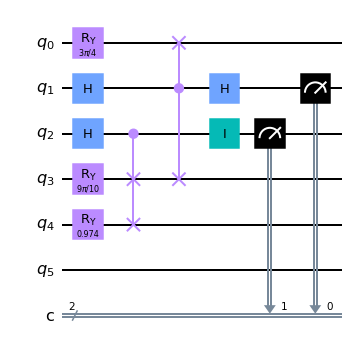

{1024: 0.0035678042446972277, 2048: 0.004972334743900134, 4096: 0.003199837493446184, 8192: 0.0030845687998432903, 16384: 0.0013200275168910895} {1024: 0.007045398311775374, 2048: 0.011836686641480377, 4096: 0.018787483882590765, 8192: 0.0033349970132404267, 16384: 0.0022614559106308584}


In [90]:
qc = get_curcuit(gatePHI, gate1, gate2)
a, b = {}, {}
for shots in [1024, 2048, 4096, 8192, 2*8192]:
    counts = run_experiment_with_shots(qc, shots, draw = False)
    result = postproces_counts(counts)
    final  = evaluate(result, product3, product4)
    a[shots], b[shots] = final[3], final[4]
print(a, b)

In [91]:
a

{1024: 0.0035678042446972277,
 2048: 0.004972334743900134,
 4096: 0.003199837493446184,
 8192: 0.0030845687998432903,
 16384: 0.0013200275168910895}

In [92]:
b

{1024: 0.007045398311775374,
 2048: 0.011836686641480377,
 4096: 0.018787483882590765,
 8192: 0.0033349970132404267,
 16384: 0.0022614559106308584}

# Testing with 4 gates

In [225]:
def get_curcuit4(gatePHI, gates):
    c = QuantumCircuit(9,4)
    c.h([0, 1, 2, 3])
    c.append(gatePHI, [4])
    for i, g in enumerate(gates):
        c.append(g, [i + 5])
        
    c.append(CSwapGate(), [3, 5, 6])
    c.append(CSwapGate(), [2, 7, 8])
    c.append(CSwapGate(), [1, 5, 7])
    c.append(CSwapGate(), [0, 4, 5])
    
    c.h(0)
    stv1 = qi.Statevector.from_instruction(c)

    for i in range(4):
        c.measure(i, i)
    

    display(c.draw("mpl"))
    return c

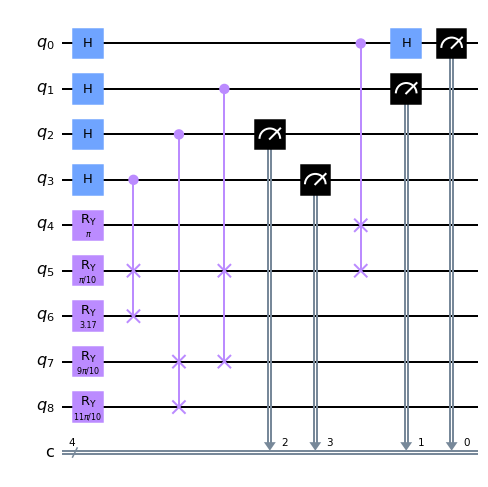

In [231]:
gatePHI = RYGate(1 * math.pi)
gate1 = RYGate(0.10 * math.pi)
gate2 = RYGate(1.01 * math.pi)
gate3 = RYGate(0.90 * math.pi)
gate4 = RYGate(1.10 * math.pi)
gates = [gate1, gate2, gate3, gate4]
qc4 = get_curcuit4(gatePHI, gates)

In [232]:
def run_experiment_with_shots(circuit, shots, draw = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if draw:
        display(plot_histogram(counts))
    return counts

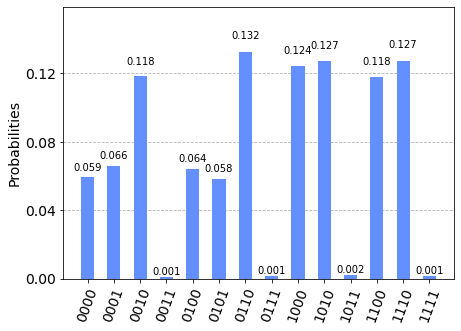

In [233]:
counts = run_experiment_with_shots(qc4, 5000, True)

In [234]:
# order {q3, q2, q1}
state_to_key = {'000': 5, '001': 7, '010': 5, '011':8, '100':6, '101': 7, '110': 6, '111': 8}

def process_counts(counts):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        p = d['1']/(d['1'] + d['0'])
        experiment_results[k] = p
        print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

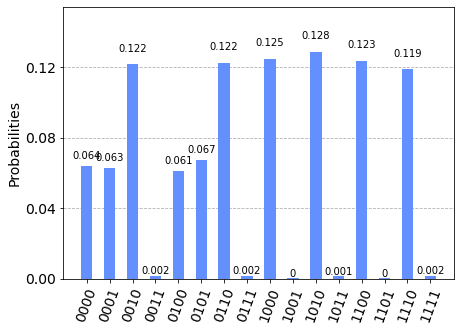

Probability of 1 in gate 5 is 0.5096267190569744
Probability of 1 in gate 6 is 0.0008051529790660225
Probability of 1 in gate 7 is 0.011075949367088608
Probability of 1 in gate 8 is 0.012689316414244782


In [235]:
counts = run_experiment_with_shots(qc4, 10000, True)
experiment_results = process_counts(counts)

In [236]:
def get_answer(gate):
    x4 = QuantumCircuit(1)
    x4.append(gate, [0])
    stv1 = qi.Statevector.from_instruction(x4)
    return (stv1[0], stv1[1])

In [237]:
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    print(f"Real answer for gate {i + 5} is {p}")

Real answer for gate 5 is (0.4877641290737884+0j)
Real answer for gate 6 is (0.0001233599085671+0j)
Real answer for gate 7 is (0.01223587092621159+0j)
Real answer for gate 8 is (0.0122358709262117+0j)


In [239]:
print("What algorithm returns")
print({k: v for k, v in experiment_results.items()})
print("What is the real answer")
print(answers)

What algorithm returns
{5: 0.5096267190569744, 6: 0.0008051529790660225, 7: 0.011075949367088608, 8: 0.012689316414244782}
What is the real answer
{5: 0.4877641290737884, 6: 0.0001233599085671, 7: 0.01223587092621159, 8: 0.0122358709262117}


In [240]:
y_test = {k: 1 - v for k, v in experiment_results.items()}
s = 0
for i in range(5, 9):
    s += abs(y_test[i] - answers[i])

print(s)

2.9534436313478474


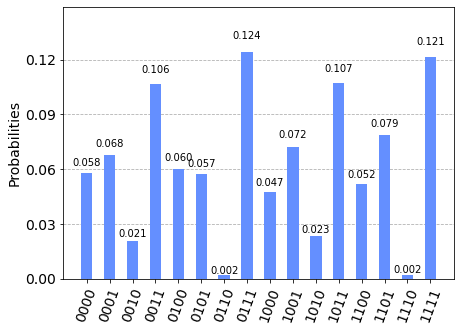

Probability of 1 in gate 5 is 0.5148026315789473
Probability of 1 in gate 6 is 0.6033586565373851
Probability of 1 in gate 7 is 0.8295145631067962
Probability of 1 in gate 8 is 0.9843499197431782
0.008546254106908568


In [194]:
counts = run_experiment_with_shots(qc4, 10000, True)
experiment_results = process_counts(counts)
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    
y_test = {k: 1 - v for k, v in experiment_results.items()}
s = 0
for i in range(5, 9):
    s += abs(y_test[i] - answers[i])

print(s)

In [241]:
print(counts)

{'1001': 1, '0111': 15, '1011': 13, '1101': 1, '1111': 16, '0001': 626, '0011': 15, '0101': 671, '0010': 1216, '0000': 639, '1100': 1234, '0100': 609, '0110': 1224, '1010': 1284, '1110': 1188, '1000': 1248}


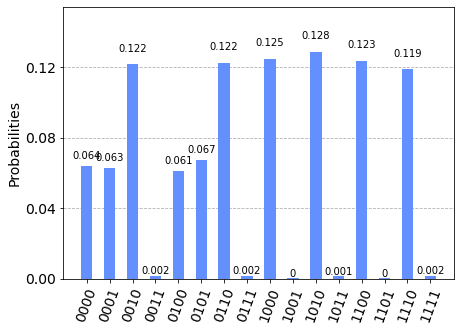

In [242]:
plot_histogram(counts)

In [243]:
def f(k):
    gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
    return (gate_index, v, k)

s = sorted(list(map(f, counts.keys())))

res = {}
for i, _, k in s:
    gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
    print(gate_index, k,  v, value)
    if gate_index in res:
        d = res[gate_index]
        if v in d:
            d[v] += value
        else:
            d[v] = value
    else:
        res[gate_index] = {v: value}

print(res)

5 0000 0 639
5 0100 0 609
5 0001 1 626
5 0101 1 671
6 1000 0 1248
6 1100 0 1234
6 1001 1 1
6 1101 1 1
7 0010 0 1216
7 1010 0 1284
7 0011 1 15
7 1011 1 13
8 0110 0 1224
8 1110 0 1188
8 0111 1 15
8 1111 1 16
{5: {'0': 1248, '1': 1297}, 6: {'0': 2482, '1': 2}, 7: {'0': 2500, '1': 28}, 8: {'0': 2412, '1': 31}}


# Completely new algorithm with indexing


In [291]:
def new_c(testing_gate, trained_gates):
    qc = QuantumCircuit(3 + 2 + 4 + 4, 2 + 1)
    qc.h([0, 3, 4])
    qc.append(testing_gate, [1])
    
    qc.barrier()
    qc.ccx(3, 4, 8)
    qc.barrier()
    qc.ccx(3, 4, 6)
    qc.cx(3, 6)
    qc.barrier()
    qc.ccx(3, 4, 7)
    qc.cx(4, 7)
    qc.barrier()
    qc.x(3)
    qc.x(4)
    qc.ccx(3, 4, 5)
    qc.x(3)
    qc.x(4)
    qc.barrier()
    
    for i in range(4):
        qc.append(gates[i], [9 + i])
    qc.barrier()
    
    qc.append(CSwapGate(), [5, 2, 9])
    qc.append(CSwapGate(), [6, 2, 10])
    qc.append(CSwapGate(), [7, 2, 11])
    qc.append(CSwapGate(), [8, 2, 12])
    qc.barrier()
    
    qc.barrier()
    qc.append(CSwapGate(), [0, 1, 2])
    qc.h(0)
    
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    
    return qc

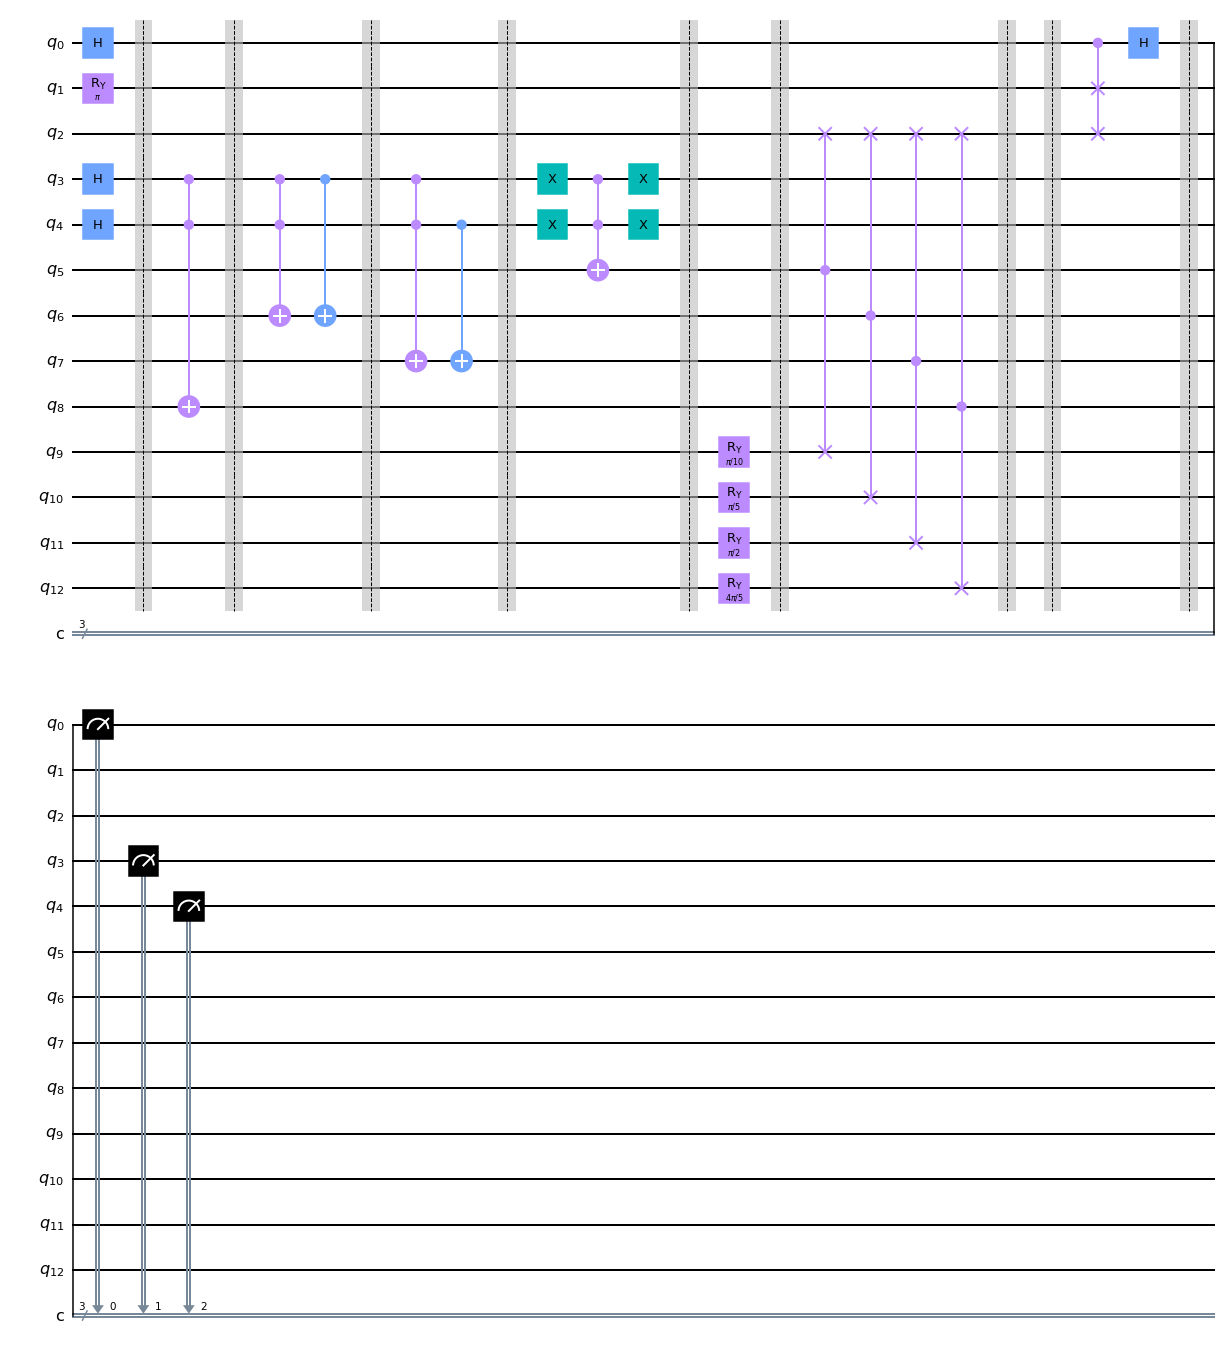

In [292]:
gatePHI = RYGate(1 * math.pi)
gate1 = RYGate(0.10 * math.pi)
gate2 = RYGate(0.20 * math.pi)
gate3 = RYGate(0.50 * math.pi)
gate4 = RYGate(0.80 * math.pi)
gates = [gate1, gate2, gate3, gate4]
qc_new = new_c(gatePHI, gates)

display(qc_new.draw("mpl"))

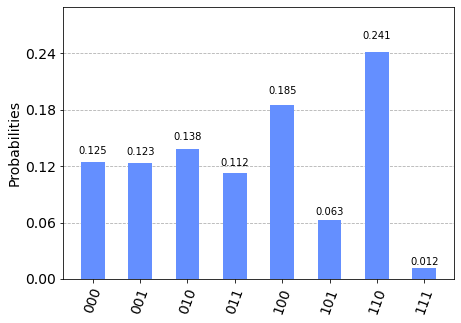

In [293]:
counts = run_experiment_with_shots(qc_new, 50000, True)

In [305]:
state_to_key = {'00': 5, '01': 6, '10': 7, '11': 8}

def process_counts(counts, verbose = False):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        p = d['1']/(d['1'] + d['0'])
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results


In [295]:
process_counts(counts)

Probability of 1 in gate 5 is 0.4967378171566653
Probability of 1 in gate 6 is 0.44800063851863675
Probability of 1 in gate 7 is 0.25439161966156326
Probability of 1 in gate 8 is 0.04720860351099162


{5: 0.4967378171566653,
 6: 0.44800063851863675,
 7: 0.25439161966156326,
 8: 0.04720860351099162}

Real answer for gate 5 is 0.4877641290737884
Real answer for gate 6 is 0.45225424859373686
Real answer for gate 7 is 0.25000000000000006
Real answer for gate 8 is 0.04774575140626319
Probability of 1 in gate 5 is 0.4967378171566653
Probability of 1 in gate 6 is 0.44800063851863675
Probability of 1 in gate 7 is 0.25439161966156326
Probability of 1 in gate 8 is 0.04720860351099162


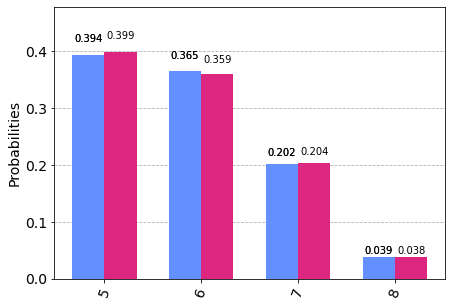

In [298]:
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    print(f"Real answer for gate {i + 5} is {answers[i + 5]}")

plot_histogram([answers, process_counts(counts)])

In [311]:
def hist_given_shots(shots):
    counts = run_experiment_with_shots(qc_new, shots, False)
    counts_processed = process_counts(counts)
    x, y = get_answer(gatePHI)
    answers = {}
    error = 0
    for i, g in enumerate(gates):
        ans = get_answer(g)
        dp = ans[0] * x + ans[1] * y
        p = 0.5 * (1 - dp * dp)
        answers[i + 5] = np.real(p)
        error += (counts_processed[i + 5] - answers[i + 5]) ** 2
    mse = error / 4    
    
    print(f"Running {shots} shots. MSE: {mse}")

    display(plot_histogram([answers, counts_processed]))

Running 1024 shots. MSE: 0.0008199873338455143


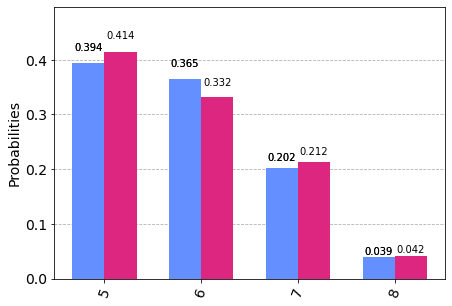

In [312]:
hist_given_shots(1024)

Running 2048 shots. MSE: 0.0004154289584701416


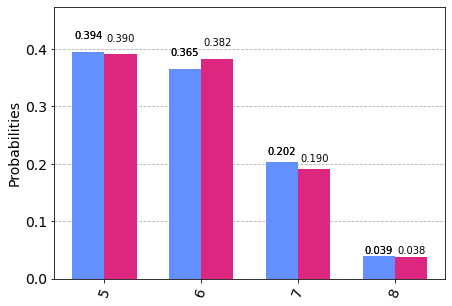

In [313]:
hist_given_shots(2048)

Running 4096 shots. MSE: 7.473229476861898e-05


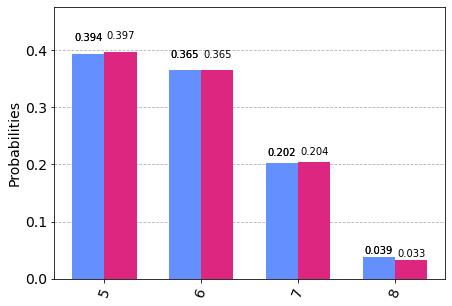

In [314]:
hist_given_shots(4096)

Running 50000 shots. MSE: 2.0380470035466456e-05


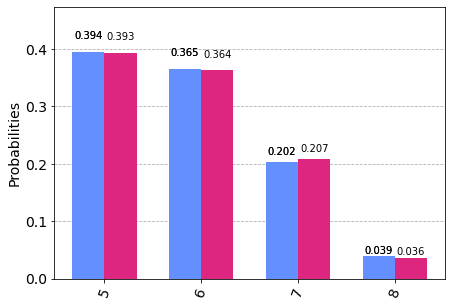

In [315]:
hist_given_shots(50000)